In [2]:
import pandas as pd

In [10]:
# df = pd.read_csv("data/bats.tsv", sep='\t')
df = pd.read_csv("data/tortoise.tsv", sep='\t')
df.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,923913306,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/686188,Animalia,Chordata,Testudines,NaN,Testudinidae,Gopherus,Gopherus agassizii,...,Paulette Loubet,2014-05-19 22:30:57,CC_BY_NC_4_0,Paulette Loubet,Paulette Loubet,NaN,NaN,2024-04-13T12:47:05.892Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
1,923908473,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/38274,Animalia,Chordata,Testudines,NaN,Testudinidae,Gopherus,Gopherus agassizii,...,bryanto,2011-11-05 18:14:39,CC_BY_NC_4_0,bryanto,bryanto,NaN,NaN,2024-04-13T12:46:48.088Z,NaN,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
2,911505466,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/721178,Animalia,Chordata,Testudines,NaN,Testudinidae,Gopherus,Gopherus agassizii,...,Greg Watson,2014-06-06 23:34:50,CC_BY_NC_4_0,Greg Watson,Greg Watson,NaN,NaN,2024-04-13T12:46:59.601Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
3,911505446,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/721162,Animalia,Chordata,Testudines,NaN,Testudinidae,Gopherus,Gopherus agassizii,...,shworthi,2014-06-06 23:21:08,CC_BY_NC_4_0,shworthi,shworthi,NaN,NaN,2024-04-13T12:47:35.575Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
4,911505439,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/721185,Animalia,Chordata,Testudines,NaN,Testudinidae,Gopherus,Gopherus agassizii,...,shworthi,2014-06-06 23:43:25,CC_BY_NC_4_0,shworthi,shworthi,NaN,NaN,2024-04-13T13:43:40.579Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


In [11]:
# Taking only the latitude and longitude columns
coords = df[['decimalLatitude', 'decimalLongitude']]
coords

,decimalLatitude,decimalLongitude
0,35.172332,-115.751307
1,34.901795,-114.116363
2,35.482908,-117.777106
3,35.057493,-117.972189
4,34.992769,-115.706428
...,...,...
2053,35.510134,-117.689320
2054,31.969050,-111.888847
2055,31.969050,-111.888847
2056,36.131570,-115.416860


In [12]:
coords_unique = coords.drop_duplicates()
coords_unique

,decimalLatitude,decimalLongitude
0,35.172332,-115.751307
1,34.901795,-114.116363
2,35.482908,-117.777106
3,35.057493,-117.972189
4,34.992769,-115.706428
...,...,...
2051,35.952252,-117.317980
2052,36.432222,-115.294250
2053,35.510134,-117.689320
2056,36.131570,-115.416860


In [13]:
print(coords_unique.decimalLatitude.min())
print(coords_unique.decimalLatitude.max())

25.4303216
45.35


In [16]:
print(coords_unique.decimalLongitude.min())
print(coords_unique.decimalLongitude.max())

-119.968887
-75.8139


In [15]:
coords_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1963 entries, 0 to 2057
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   decimalLatitude   1963 non-null   float64
 1   decimalLongitude  1963 non-null   float64
dtypes: float64(2)
memory usage: 46.0 KB


# Cropping the Bioclim raster files  
To match the area that animals are found in 

In [8]:
# Define the Colombian Amazon extent: latitude ~12°N and ~4°S and between longitudes ~67° and ~79°W.
lat_extent = [12, -4.3]
long_extent = [-79, -67]
# Define the extent coordinates (west, south, east, north)
# west, south, east, north = -79, -4.3, -67, 12
west, south, east, north = -76, -4.5, -67, 5


In [34]:
# Define the extent of the desert tortoise range
west, south, east, north = -120, 24, -100, 45

In [42]:
# Specify the directory containing the raster files
input_directory = 'data/wc2'
output_directory = 'inputs/cropped_bioclim_tortoise'

# Define geographic coordinates for the bounding box
west, south, east, north = -120, 24, -100, 45

In [41]:
import rasterio
from rasterio.windows import from_bounds
import os

# Open the raster file
# with rasterio.open('data/wc2/wc2.1_2.5m_bio_1.tif') as src:
    
#     # Convert geographic coordinates to raster window
#     window = from_bounds(west, south, east, north, src.transform)
    
#     # Read the data in the window, cropping to the extent
#     data = src.read(window=window)
    
#     # Directory to save the output files
#     output_dir = 'data/wc2/cropped_bioclim_tortoise'
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     # Loop through each band and write to ASCII
#     for i in range(1, src.count + 1):  # This will handle all bands in the raster
#         output_path = os.path.join(output_dir, f'bclim{i}.asc')
#         with rasterio.open(output_path, 'w', driver='AAIGrid', height=window.height, width=window.width,
#                            count=1, dtype=data.dtype, transform=rasterio.windows.transform(window, src.transform)) as dst:
#             dst.write(data[i-1], 1)  # Write each band to a new file

def process_raster_files(directory, west, south, east, north, output_dir):
    # Create the output directory if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Walk through all files in the input directory
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.tif'):
                file_path = os.path.join(root, file)
                with rasterio.open(file_path) as src:
                    # Convert geographic coordinates to raster window
                    window = from_bounds(west, south, east, north, src.transform)

                    # Read the data in the window, cropping to the extent
                    data = src.read(window=window)

                    # Loop through each band and write to ASCII
                    for i in range(1, src.count + 1):
                        output_path = os.path.join(output_dir, f'{os.path.splitext(file)[0]}_band{i}.asc')
                        with rasterio.open(output_path, 'w', driver='AAIGrid', height=window.height, width=window.width,
                                           count=1, dtype=data.dtype, transform=rasterio.windows.transform(window, src.transform)) as dst:
                            dst.write(data[i-1], 1)  # Write each band to a new file


In [43]:
process_raster_files(input_directory, west, south, east, north, output_directory)

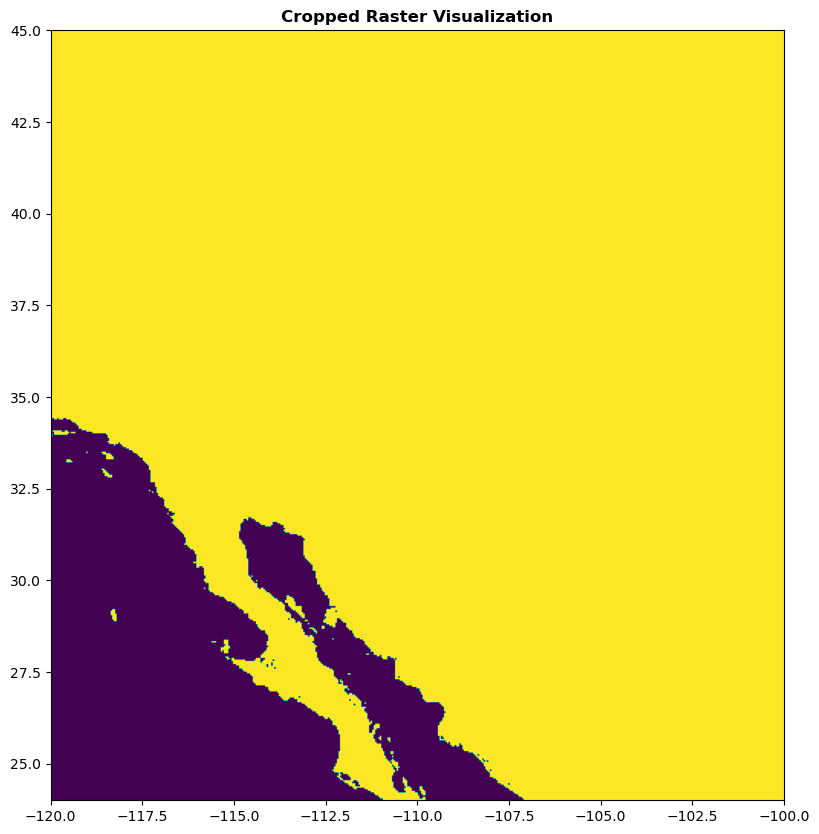

In [93]:
# Making sure the cropping worked

import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show

# Path to the raster file you want to check
file_path = 'inputs/cropped_bioclim_tortoise/wc2.1_2.5m_bio_1_band1.asc'

# Open the raster file
with rasterio.open(file_path) as src:
    # Read the first band (assuming the file is single-band)
    data = src.read(1)
    
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Use rasterio's show method, which handles GeoTransforms correctly
    show(data, ax=ax, transform=src.transform, title='Cropped Raster Visualization')
    plt.show()

In [94]:
# Again, making sure cropping worked.

import folium

# Map centered around the rough middle of the Colombian Amazon
m = folium.Map(location=[32, -113], zoom_start=5)

# Define the boundaries
# west, south, east, north = -76, -4.5, -67, 5
west, south, east, north = -120, 24, -100, 45

# Create a rectangle to represent the extent
folium.Rectangle(
    bounds=[[south, west], [north, east]],
    color='red',
    fill=True,
    fill_color='red',
    fill_opacity=0.2,
).add_to(m)

# Display the map
m


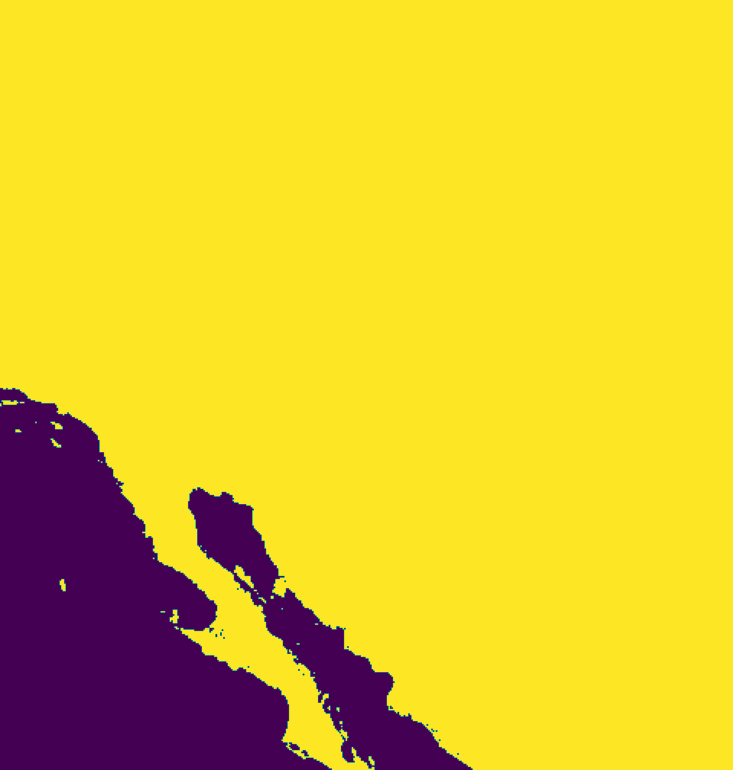

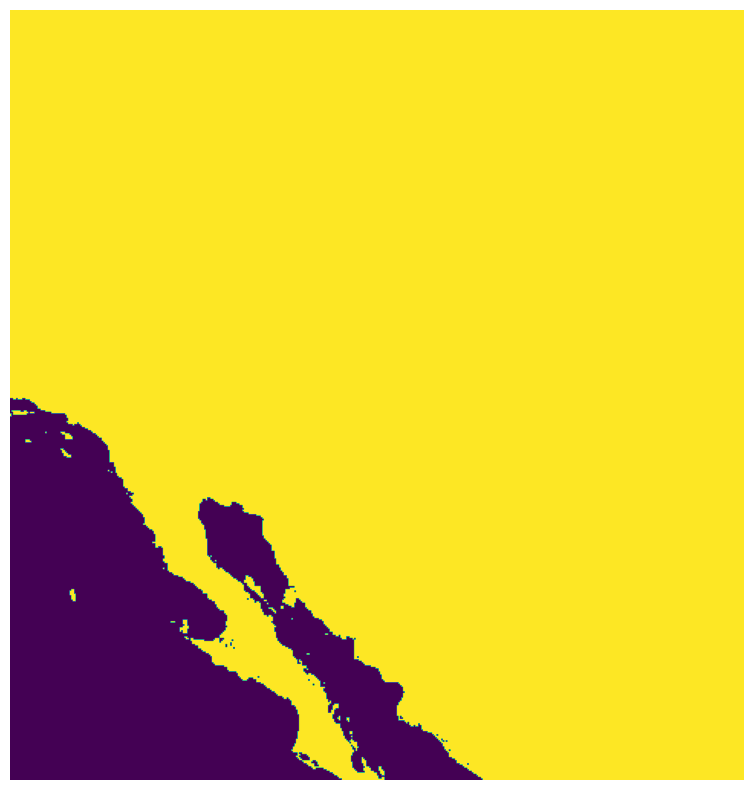

In [91]:
# Testing overlay of bioclim variable raster on folium map - working. 

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from io import BytesIO
import folium
import base64

# Load your raster data
with rasterio.open('inputs/cropped_bioclim_tortoise/wc2.1_2.5m_bio_1_band1.asc') as src:
    # Make a note of the raster bounds
    bounds = src.bounds
    
    # Read the data (e.g., first band)
    data = src.read(1)
    
    # Normalize the data for better visualization
    data = (data - data.min()) / (data.max() - data.min())
    
    # Create a plot
    fig, ax = plt.subplots(frameon=False, figsize=(10, 10))
    plt.axis('off')
    colormap = plt.cm.viridis  # You can change the colormap to something appropriate for your data
    show(data, ax=ax, cmap=colormap, transform=src.transform, adjust='datalim')
    
    # Save the plot to a PNG image in memory
    img = BytesIO()
    plt.savefig(img, format='png', bbox_inches='tight', pad_inches=0, transparent=True)
    img.seek(0)
    img_base64 = base64.b64encode(img.read()).decode('utf-8')

# Define the image overlay bounds
image_bounds = [[bounds.bottom, bounds.left], [bounds.top, bounds.right]]

# Create a folium map centered on your data
m = folium.Map(location=[(bounds.top + bounds.bottom) / 2, (bounds.left + bounds.right) / 2], zoom_start=5)

# Add the image overlay to the map
folium.raster_layers.ImageOverlay(
    image='data:image/png;base64,' + img_base64,
    bounds=image_bounds,
    opacity=0.6  # Adjust opacity as needed
).add_to(m)

# Display the map
m




# Presence & Absence Sampling + Creating a geodatabase shape file

In [46]:
import geopandas as gpd
import numpy as np
import rasterio
from rasterio.features import geometry_window
from shapely.geometry import box
from shapely.ops import unary_union

# Function to generate background points based on extent of presence points
def sample_background_points(raster, num_points, extent_factor):
    with rasterio.open(raster) as src:
        # Create a bounding box that is 25% larger (sampling from a larger area helps with edge effects)
        b = src.bounds
        width = (b.right - b.left) * (extent_factor - 1) / 2
        height = (b.top - b.bottom) * (extent_factor - 1) / 2
        larger_extent = box(b.left - width, b.bottom - height, b.right + width, b.top + height)

        # Generate random points within the larger extent
        xs = np.random.uniform(b.left - width, b.right + width, num_points)
        ys = np.random.uniform(b.bottom - height, b.top + height, num_points)

        # Filter points to lie within the original raster extent
        points = gpd.GeoDataFrame(geometry=gpd.points_from_xy(xs, ys))
        original_extent = box(b.left, b.bottom, b.right, b.top)
        points = points[points.geometry.within(original_extent)]

    return points



In [47]:
# Path to the bioclimatic variable raster
raster_path = 'outputs/cropped_bioclim_tortoise/wc2.1_2.5m_bio_1_band1.asc'

# Number of presence points (in dataframe of occurrences)
length_presences = len(coords_unique)

# Sample background points
background_points = sample_background_points(raster_path, length_presences * 2, 1.25)

# Rename columns to 'lon' and 'lat'
background_points['decimalLongitude'] = background_points.geometry.x
background_points['decimalLatitude'] = background_points.geometry.y

# Create the training data by combining presence and background points
train = pd.concat([coords_unique, background_points[['decimalLongitude', 'decimalLatitude']]], ignore_index=True)

# Create presence-absence column
pa_train = np.concatenate([np.ones(len(coords_unique)), np.zeros(len(background_points))])

# Final DataFrame
train = pd.DataFrame({'CLASS': pa_train, 'lon': train['decimalLongitude'], 'lat': train['decimalLatitude']})

In [48]:
train

,CLASS,lon,lat
0,1.0,-115.751307,35.172332
1,1.0,-114.116363,34.901795
2,1.0,-117.777106,35.482908
3,1.0,-117.972189,35.057493
4,1.0,-115.706428,34.992769
...,...,...,...
4423,0.0,-113.672253,31.677101
4424,0.0,-102.175642,31.461471
4425,0.0,-119.680248,37.173348
4426,0.0,-112.791283,41.863841


In [50]:
# Check coordinate reference system (crs)
with rasterio.open('data/wc2/wc2.1_2.5m_bio_1.tif') as src:
    # Print the CRS
    print(src.crs)

EPSG:4326


In [78]:
# creating the shape files needed for modeling in section 2
from shapely.geometry import Point

# Shuffle the DataFrame
train = train.sample(frac=1).reset_index(drop=True)

# Extract the 'CLASS' column into a separate DataFrame and name the column
class_pa = pd.DataFrame(train.iloc[:, 0])
class_pa.columns = ['CLASS']

# Assuming 'train' has longitude in the 2nd column and latitude in the 3rd column
# Create the GeoDataFrame
geometry = [Point(xy) for xy in zip(train.iloc[:, 1], train.iloc[:, 2])]
data_map = gpd.GeoDataFrame(class_pa, geometry=geometry)

# crs_proj4 = '+proj=longlat +datum=WGS84 +no_defs'  # EPSG:4326
# data_map.set_crs(crs_proj4, inplace=True)

data_map.crs = 'EPSG:4326'  # Directly setting EPSG code


# Write to shapefile
data_map.to_file('inputs/tortoise.shp', driver='ESRI Shapefile')

In [79]:
# Read shapefile as a geodataframe
pa = gpd.GeoDataFrame.from_file("inputs/tortoise.shp")
pa.sample(5) # GeoDataFrame for the species

,CLASS,geometry
3284,0.0,POINT (-109.20961 39.76574)
3077,0.0,POINT (-105.39799 30.12660)
1188,0.0,POINT (-110.92574 39.81419)
3561,1.0,POINT (-114.72618 34.90371)
1772,0.0,POINT (-101.11970 37.05536)


In [80]:
print("number of duplicates: ", pa.duplicated(subset='geometry', keep='first').sum())
print("number of NA's: ", pa['geometry'].isna().sum())
print("Coordinate reference system is: {}".format(pa.crs))
print("{} observations with {} columns".format(*pa.shape))

number of duplicates:  0
number of NA's:  0
Coordinate reference system is: EPSG:4326
4428 observations with 2 columns


In [81]:
pa[pa.CLASS == 1]
# .plot(marker='*', color='green', markersize=8)

,CLASS,geometry
0,1.0,POINT (-113.79738 37.02199)
1,1.0,POINT (-115.79682 34.60365)
2,1.0,POINT (-115.67066 35.70189)
6,1.0,POINT (-116.36818 33.91747)
8,1.0,POINT (-114.96374 35.72304)
...,...,...
4409,1.0,POINT (-116.84122 36.71905)
4411,1.0,POINT (-115.80748 33.87822)
4417,1.0,POINT (-116.82293 34.83355)
4424,1.0,POINT (-116.54051 34.12023)


In [84]:
pa['longitude'] = pa.geometry.x
pa['latitude'] = pa.geometry.y

In [85]:
pa = pa[(pa['longitude'] >= -180) & (pa['longitude'] <= 180)]
pa = pa[(pa['latitude'] >= -90) & (pa['latitude'] <= 90)]
pa

,CLASS,geometry,longitude,latitude
0,1.0,POINT (-113.79738 37.02199),-113.797384,37.021992
1,1.0,POINT (-115.79682 34.60365),-115.796818,34.603651
2,1.0,POINT (-115.67066 35.70189),-115.670665,35.701893
3,0.0,POINT (-116.23305 39.56049),-116.233046,39.560494
4,0.0,POINT (-109.01142 25.53201),-109.011419,25.532011
...,...,...,...,...
4423,0.0,POINT (-108.91329 35.79973),-108.913290,35.799733
4424,1.0,POINT (-116.54051 34.12023),-116.540506,34.120232
4425,0.0,POINT (-101.72014 24.63618),-101.720139,24.636179
4426,0.0,POINT (-105.39517 31.44314),-105.395175,31.443136


/var/folders/g6/yqj0vmlj33b7__k76lt96cqm0000gn/T/ipykernel_33154/767367679.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


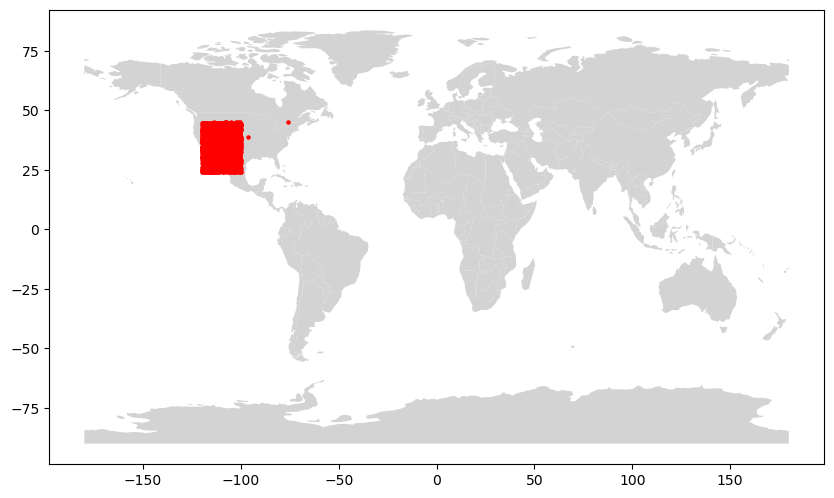

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax, color='lightgrey')
pa.plot(ax=ax, marker='o', color='red', markersize=5)  # Plotting your points in red for visibility
plt.show()

# prob need to delete point on east coast

<Axes: >

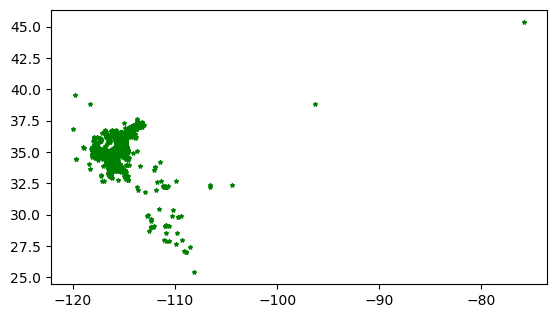

In [87]:
pa[pa.CLASS == 1].plot(marker='*', color='green', markersize=8)

<Axes: >

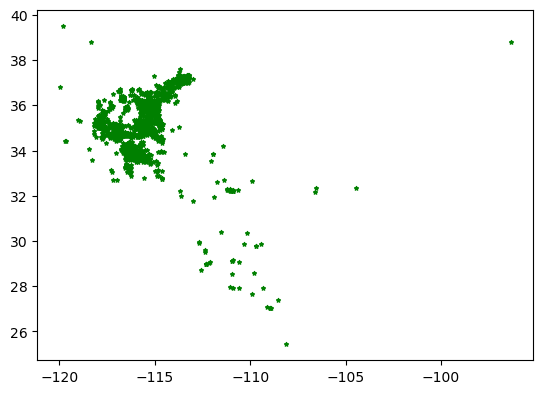

In [95]:
pa = pa[pa.geometry.x < -90]
pa[pa.CLASS == 1].plot(marker='*', color='green', markersize=8)

<Axes: >

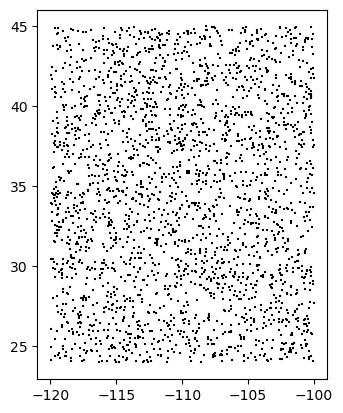

In [96]:
pa[pa.CLASS == 0].plot(marker='+', color='black', markersize=4)

In [98]:
# Pickling the cleaned presence absence geodataframe for later use in modeling
pa.to_pickle('inputs/pa.pickle')

In [ ]:
# load the presence absence geodataframe
pa = gpd.read_pickle('inputs/pa.pickle')